In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
train_df = pd.read_excel('Train_dataset.xlsx')

In [4]:
df = train_df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [14]:
df.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index             0
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)       0
Tracking Error           71
Dollar Exchange Rate      0
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

In [15]:
df.nunique()

Stock Index             7383
Index                      5
Industry                   5
VWAP                    7067
General Index              5
NAV                     5000
P/E Ratio               5950
Volumes Traded          7113
Inventory Turnover       578
Covid Impact (Beta)        5
Tracking Error           465
Dollar Exchange Rate       3
Put-Call Ratio            70
P/B Ratio                912
Stock Price             7383
dtype: int64

##### Handling the null values

In [7]:
# to fill null dollar exchange rates with help of index
def fill_der(index):
    if index == 'NYSE' or index == 'S&P 500':
        return 1
    if index == 'BSE' or index == 'NSE':
        return 74.9
    return 17.7


In [9]:
# to fill covid impact with help of industry
def fill_ci(industry):
    if industry == 'Real Estate':
        return -0.43
    if industry == 'Information Tech':
        return 0.23
    if industry == 'Materials':
        return 0.03
    if industry == 'Healthcare':
        return 0.78
    if industry == 'Energy':
        return 0.11

In [11]:
# to fill General Index with help of Index
def fill_ge(index):
    if index == 'NYSE':
        return 12765.84
    if index == 'S&P 500':
        return 3351.28
    if index == 'BSE':
        return 38182.08
    if index == 'NSE':
        return 11270.15
    if index == 'JSE':
        return 55722

In [13]:
df['Dollar Exchange Rate'] = df['Index'].apply(fill_der)
df['Covid Impact (Beta)'] = df['Industry'].apply(fill_ci)
df['General Index'] = df['Index'].apply(fill_ge)

In [28]:
df = df.dropna()

In [30]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6621 entries, 0 to 7357
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           6621 non-null   object 
 1   Index                 6621 non-null   object 
 2   Industry              6621 non-null   object 
 3   VWAP                  6621 non-null   float64
 4   General Index         6621 non-null   float64
 5   NAV                   6621 non-null   float64
 6   P/E Ratio             6621 non-null   float64
 7   Volumes Traded        6621 non-null   float64
 8   Inventory Turnover    6621 non-null   float64
 9   Covid Impact (Beta)   6621 non-null   float64
 10  Tracking Error        6621 non-null   float64
 11  Dollar Exchange Rate  6621 non-null   float64
 12  Put-Call Ratio        6621 non-null   float64
 13  P/B Ratio             6621 non-null   float64
 14  Stock Price           6621 non-null   float64
dtypes: float64(12), objec

<h5>Feature Selection</h5>

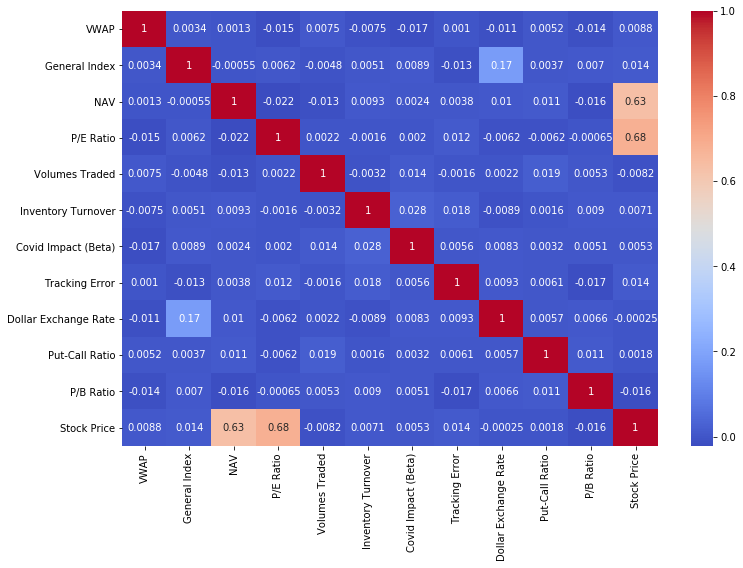

In [39]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = 'coolwarm')

In [179]:
col_list = ['VWAP', 'General Index', 'NAV', 'P/E Ratio', 'Volumes Traded', 'Inventory Turnover']

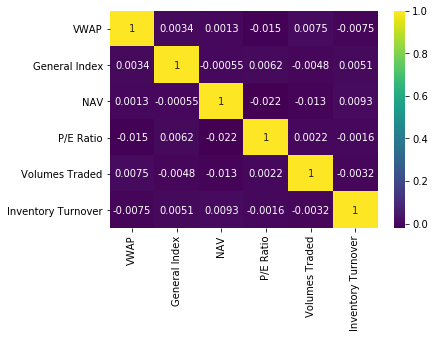

In [180]:
sns.heatmap(df[col_list].corr(), annot = True, cmap = 'viridis')

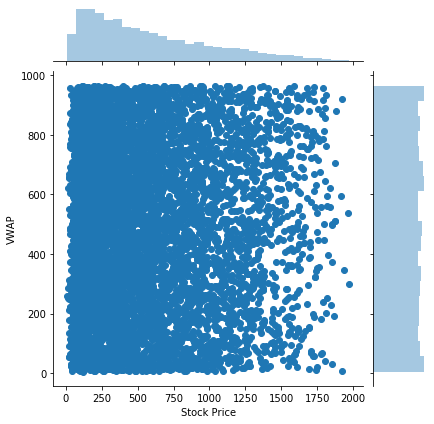

In [220]:
sns.jointplot(x = 'Stock Price', y = 'VWAP', data = train_df)

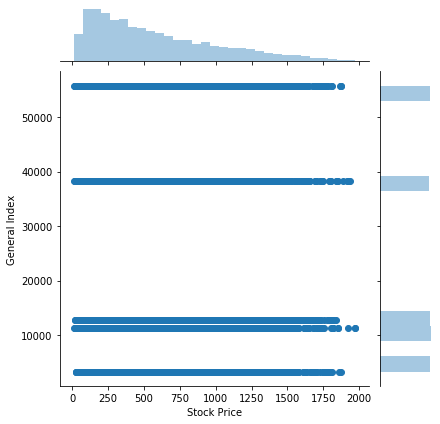

In [221]:
sns.jointplot(x = 'Stock Price', y = 'General Index', data = train_df)

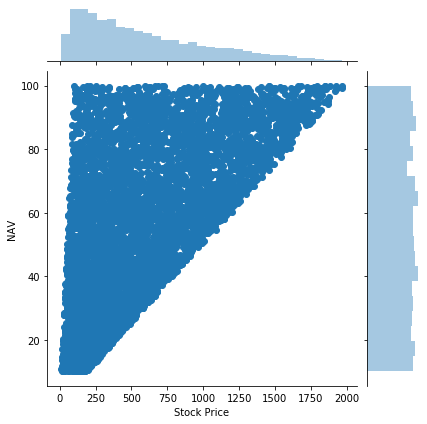

In [222]:
sns.jointplot(x = 'Stock Price', y = 'NAV', data = train_df)

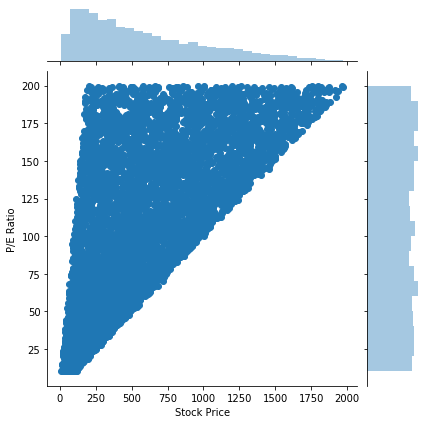

In [223]:
sns.jointplot(x = 'Stock Price', y = 'P/E Ratio', data = train_df)

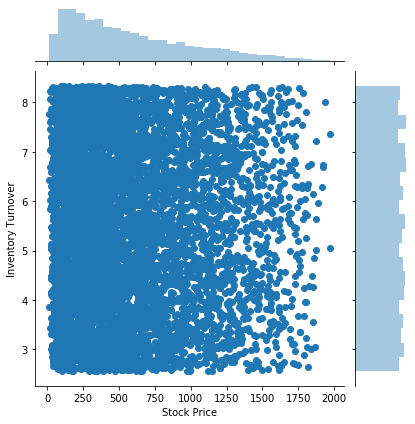

In [224]:
sns.jointplot(x = 'Stock Price', y = 'Inventory Turnover', data = train_df)

##### Prediction using train data

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [178]:
model = LinearRegression()

In [183]:
train_df = df.copy()

In [184]:
X = train_df[col_list]
Y = train_df['Stock Price']

In [185]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 57)

In [186]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
ypred = model.predict(xtest)

In [190]:
print( mean_squared_error(ytest, ypred)**0.5 )

135.86421130170902


##### Now we train with all the data

In [191]:
model = LinearRegression()

In [192]:
model.fit(train_df[col_list], train_df['Stock Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Now we import the test data and clean it

In [193]:
test_df = pd.read_excel('Test_dataset.xlsx')

In [194]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           3331 non-null   object 
 1   Index                 3331 non-null   object 
 2   Industry              3331 non-null   object 
 3   VWAP                  3319 non-null   float64
 4   General Index         3060 non-null   float64
 5   NAV                   3056 non-null   float64
 6   P/E Ratio             3039 non-null   float64
 7   Volumes Traded        3283 non-null   float64
 8   Inventory Turnover    3301 non-null   float64
 9   Covid Impact (Beta)   3300 non-null   float64
 10  Tracking Error        3205 non-null   float64
 11  Dollar Exchange Rate  3188 non-null   float64
 12  Put-Call Ratio        2902 non-null   float64
 13  P/B Ratio             3193 non-null   float64
dtypes: float64(11), object(3)
memory usage: 364.5+ KB


In [195]:
test_df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [197]:
df.isnull().sum()

Stock Index             0
VWAP                   12
General Index         271
NAV                   275
P/E Ratio             292
Volumes Traded         48
Inventory Turnover     30
dtype: int64

In [199]:
test_df['General Index'] = test_df['Index'].apply(fill_ge)

In [200]:
df = test_df[['Stock Index', 'VWAP', 'General Index', 'NAV', 'P/E Ratio', 'Volumes Traded', 'Inventory Turnover']]

In [201]:
df.isnull().sum()

Stock Index             0
VWAP                   12
General Index           0
NAV                   275
P/E Ratio             292
Volumes Traded         48
Inventory Turnover     30
dtype: int64

In [203]:
df = df.dropna()

In [204]:
df.isnull().sum()

Stock Index           0
VWAP                  0
General Index         0
NAV                   0
P/E Ratio             0
Volumes Traded        0
Inventory Turnover    0
dtype: int64

##### Predicting and saving the test data results

In [205]:
predictions = model.predict(df.drop('Stock Index', axis = 1))

In [206]:
predictions

array([ 869.13757693,  410.10290518, 1306.91036903, ...,  189.25115366,
        588.62121691, 1154.80456294])

In [213]:
predicted_df = pd.DataFrame(data = predictions, index = df['Stock Index'], columns = ['Predicted Stock Price'])

In [215]:
predicted_df.head()

,Predicted Stock Price
Stock Index,
AC3235,869.137577
AC3236,410.102905
AC3237,1306.910369
AC3238,830.370067
AC3239,374.642271


In [217]:
predicted_df.to_excel('Predicted Stock Prices.xlsx')